In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
sns.set_style("darkgrid")

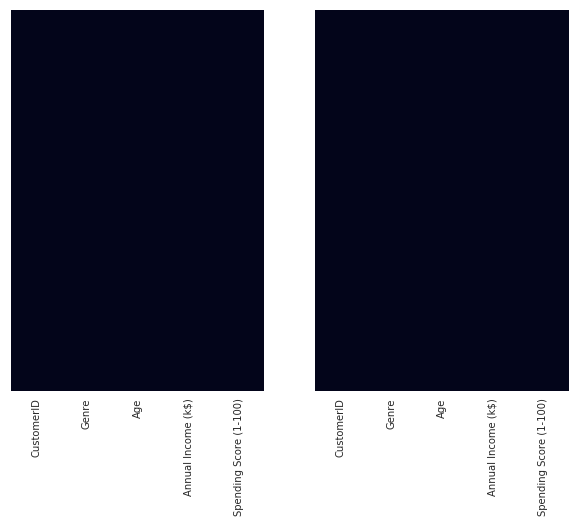

In [8]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(7)
fig.set_figwidth(10)

sns.heatmap(df.isnull(), ax=ax[0], yticklabels=False, cbar=False)
sns.heatmap(df.isna(), ax=ax[1], yticklabels=False, cbar=False)

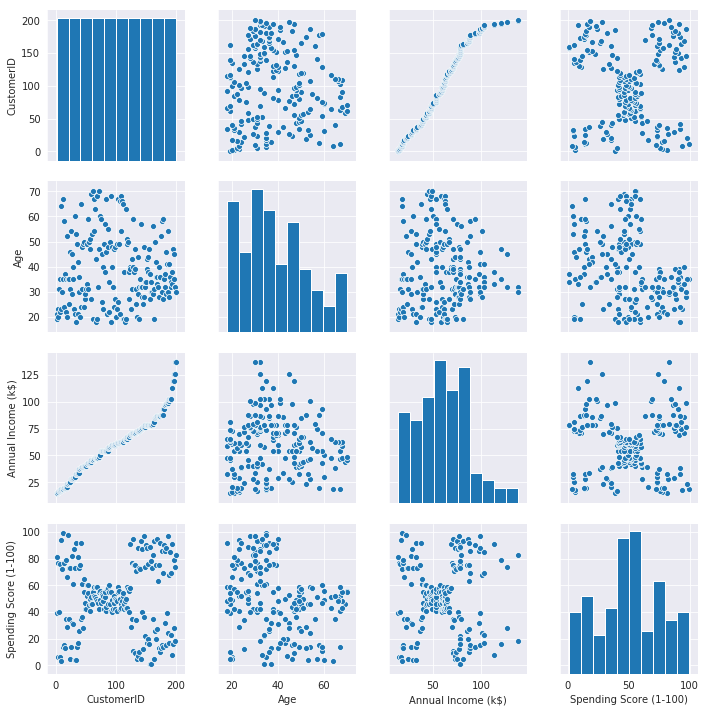

In [9]:
sns.pairplot(df)

In [11]:
X = df.iloc[:, [3, 4]].values

In [12]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distances')

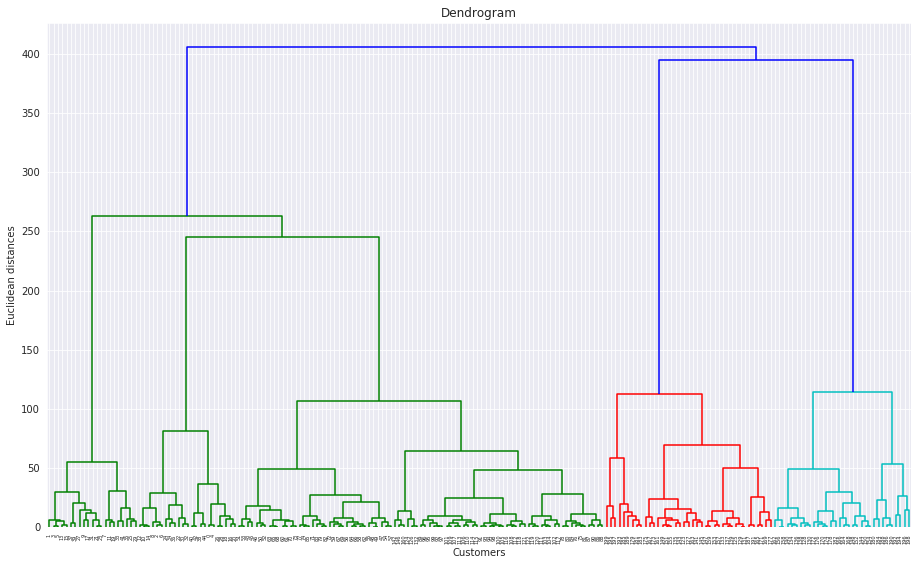

In [20]:
fig = plt.figure(figsize=(12, 7))
axes = fig.add_axes([0, 0, 1, 1])

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), ax=axes)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

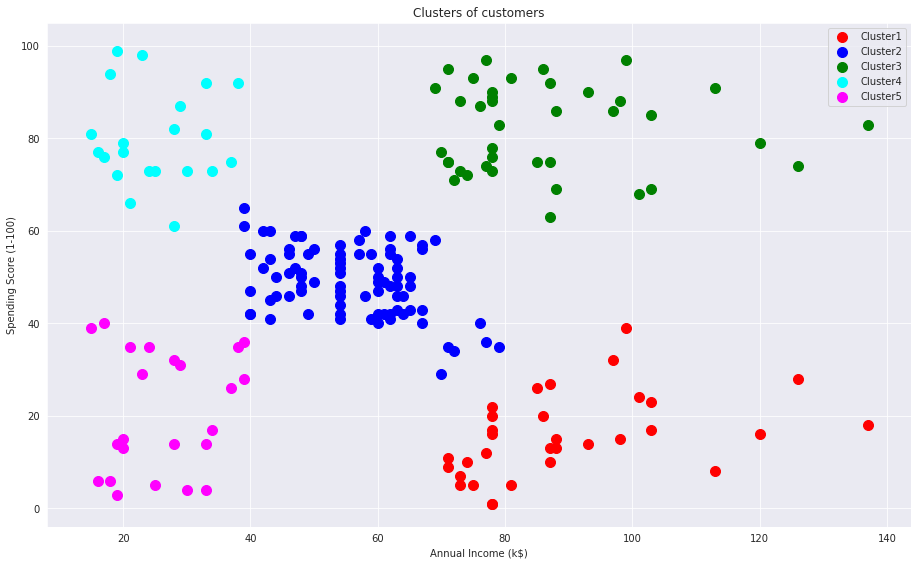

In [24]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_axes([0, 0, 1, 1])

ax.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c='red', label='Cluster1')
ax.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c='blue', label='Cluster2')
ax.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c='green', label='Cluster3')
ax.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c='cyan', label='Cluster4')
ax.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c='magenta', label='Cluster5')
ax.set_title('Clusters of customers')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.legend()